## RNA Block Operations

### Application scenario: operations kit for combining decomposed components of RNA sequences

In [5]:
%matplotlib inline

In [6]:
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)
rfam_id = 'RF00005'

In [7]:
opts={'size':14, 'node_border':False, 'node_size':200, 'font_size':9, 'vertex_alpha':0.6}

from eden.util.display import draw_graph, serialize_graph
import itertools
def plot(graphs, num=1, opts=None):    
    graphs = itertools.islice(graphs,num)
    for graph in graphs: draw_graph(graph, **opts)

In [8]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    
    from eden.converter.rna.rnafold import rnafold_to_eden
    graphs = rnafold_to_eden(seqs)

    from eden.modifier.graph import vertex_attributes
    from itertools import islice
    graphs = islice(vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['A','U','C','G']),1)

    return graphs

/home/kohvaeip/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kohvaeip/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


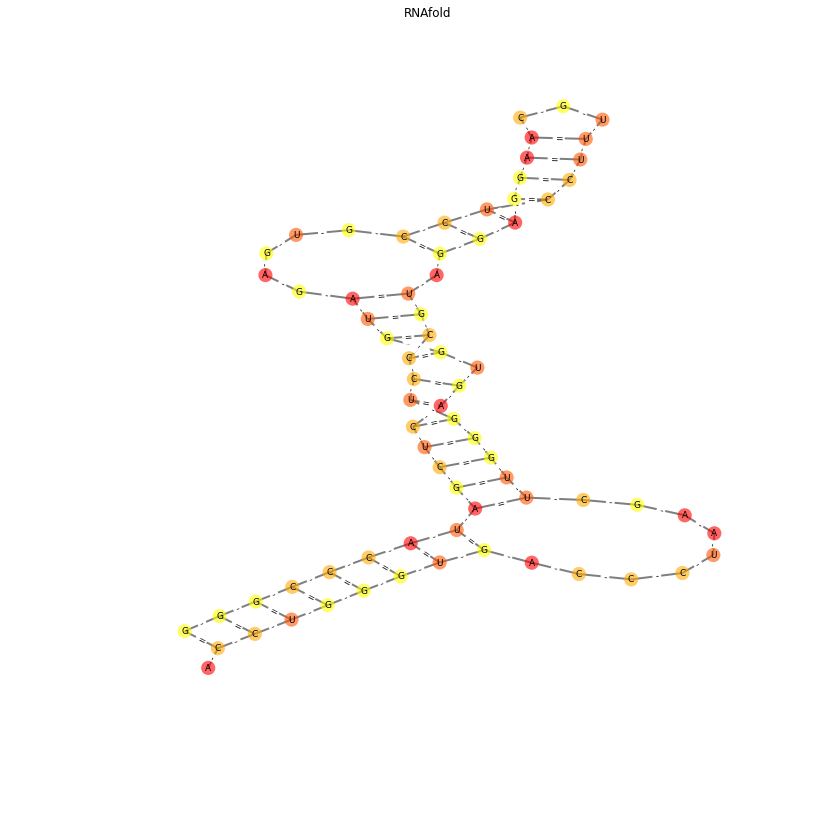

In [9]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'autumn'})
plot(graphs,opts=my_opt)

In [1]:
rfam_id = 'RF00005'

def rfam_url(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnafold import rnafold_to_eden
from eden.graph import Vectorizer
from eden.util import fit,estimate

iterable_pos = fasta_to_sequence( rfam_url(rfam_id) )

from itertools import tee
iterable_pos, iterable_pos_ = tee(iterable_pos)

from eden.modifier.seq import seq_to_seq,  shuffle_modifier
iterable_neg = seq_to_seq( iterable_pos_ , modifier=shuffle_modifier, times=3, order=2 )

#Positive sample graphs.
graphs_pos = rnafold_to_eden( iterable_pos )
#Negative sample graphs.
graphs_neg = rnafold_to_eden( iterable_neg )

vectorizer = Vectorizer( complexity = 2 )

In [34]:
from itertools import islice
iterable = islice(fasta_to_sequence( rfam_url(rfam_id) ),2)
graphs = rnafold_to_eden( iterable )
X = vectorizer.transform( graphs )
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 2 Features: 1048577 with an avg of 541 features per instance


In [2]:
%%time
estimator = fit(graphs_pos, graphs_neg, vectorizer, n_jobs=1, cv=3)

CPU times: user 8min 9s, sys: 36.9 s, total: 8min 46s
Wall time: 9min 49s


In [35]:
import numpy as np
from sklearn import random_projection
#X = np.random.rand(1,10000)

transformer = random_projection.SparseRandomProjection(eps= 0.1)
print transformer.get_params()
X_new = transformer.fit_transform(X)
X_new.shape

{'random_state': None, 'density': 'auto', 'n_components': 'auto', 'eps': 0.1, 'dense_output': False}


(2, 594)